## Setup

In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from matplotlib import pyplot as plt
import pickle 

%cd
%cd ai-coursework-group6\notebooks\QLearning_output
%pwd

C:\Users\chozo
C:\Users\chozo\ai-coursework-group6\notebooks\QLearning_output


'C:\\Users\\chozo\\ai-coursework-group6\\notebooks\\QLearning_output'

## Agent Implementation

In [2]:
from QLearningAgent import QLearningAgent,QTable

## Train

In [3]:
from plot_helper import plot

Problem id: 0

Hyperparameter dump
----
Number Of Episodes = 1000
Print out every 20 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Episode number: 300. Total reward in episode: -1.9632216161917413. Episode executed with epsilon = 0.7757499999999915
Average total reward in last 20 episodes: -0.03030082467914603
Average number of times we exploited q table in last 20 episodes: 10.8
Episode number: 600. Total reward in episode: -1.3242582459463725. Episode executed with epsilon = 0.550749999999983
Average total reward in last 20 episodes: -0.02930107546392697
Average number of times we exploited q table in last 20 episodes: 21.9
Episode number: 900. Total reward in episode: -1.5365248996593555. Episode executed with epsilon = 0.3257499999999874
Average total reward in last 20 episodes: -0.03003876076798626
Average number of times we exploited q table in last 20 episodes: 34.15
Prob

Episode number: 300. Total reward in episode: -2.2428196445718704. Episode executed with epsilon = 0.7757499999999915
Average total reward in last 20 episodes: -0.04096982511630813
Average number of times we exploited q table in last 20 episodes: 11.6
Episode number: 600. Total reward in episode: -2.213544352155919. Episode executed with epsilon = 0.550749999999983
Average total reward in last 20 episodes: -0.03786865166213215
Average number of times we exploited q table in last 20 episodes: 22.8
Episode number: 900. Total reward in episode: -1.7479045995051368. Episode executed with epsilon = 0.3257499999999874
Average total reward in last 20 episodes: -0.03508192204905753
Average number of times we exploited q table in last 20 episodes: 34.75
Problem id: 9

Hyperparameter dump
----
Number Of Episodes = 1000
Print out every 20 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Episo

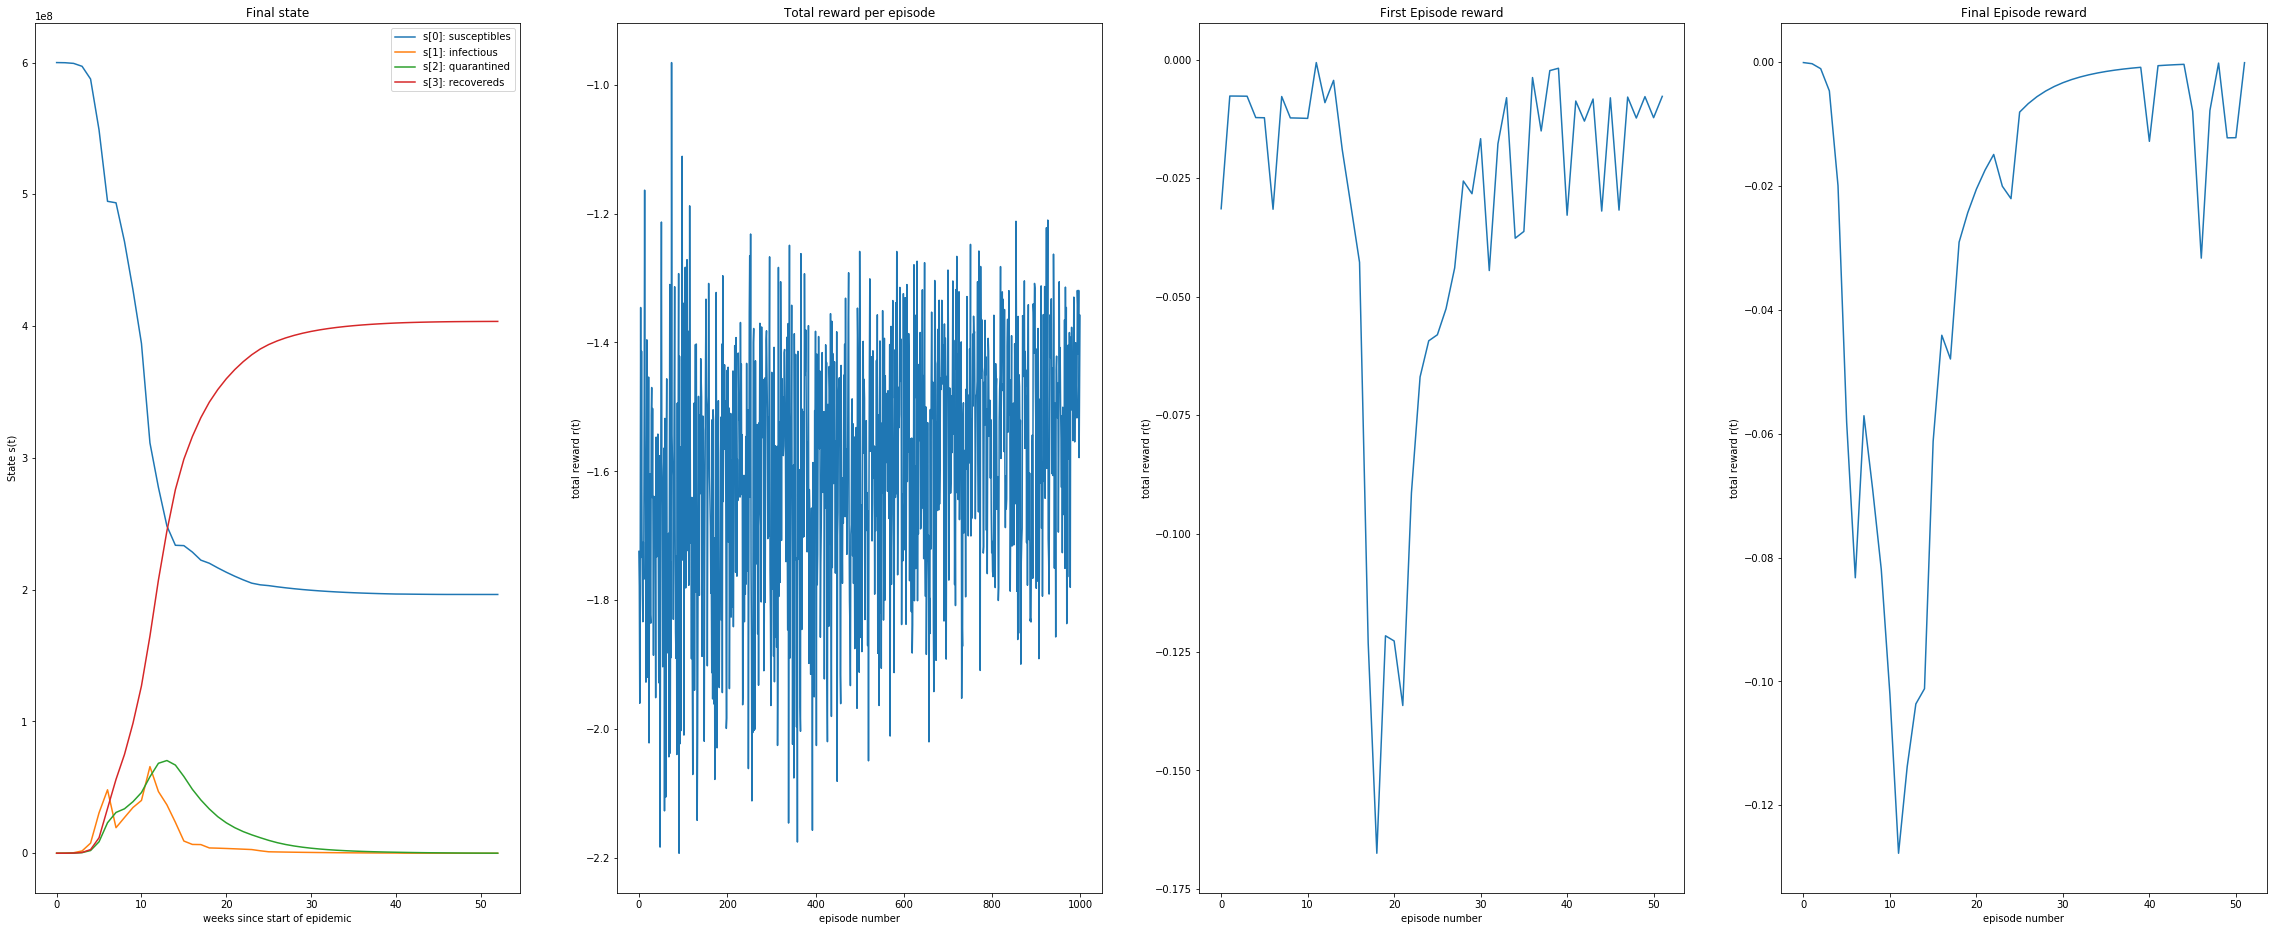

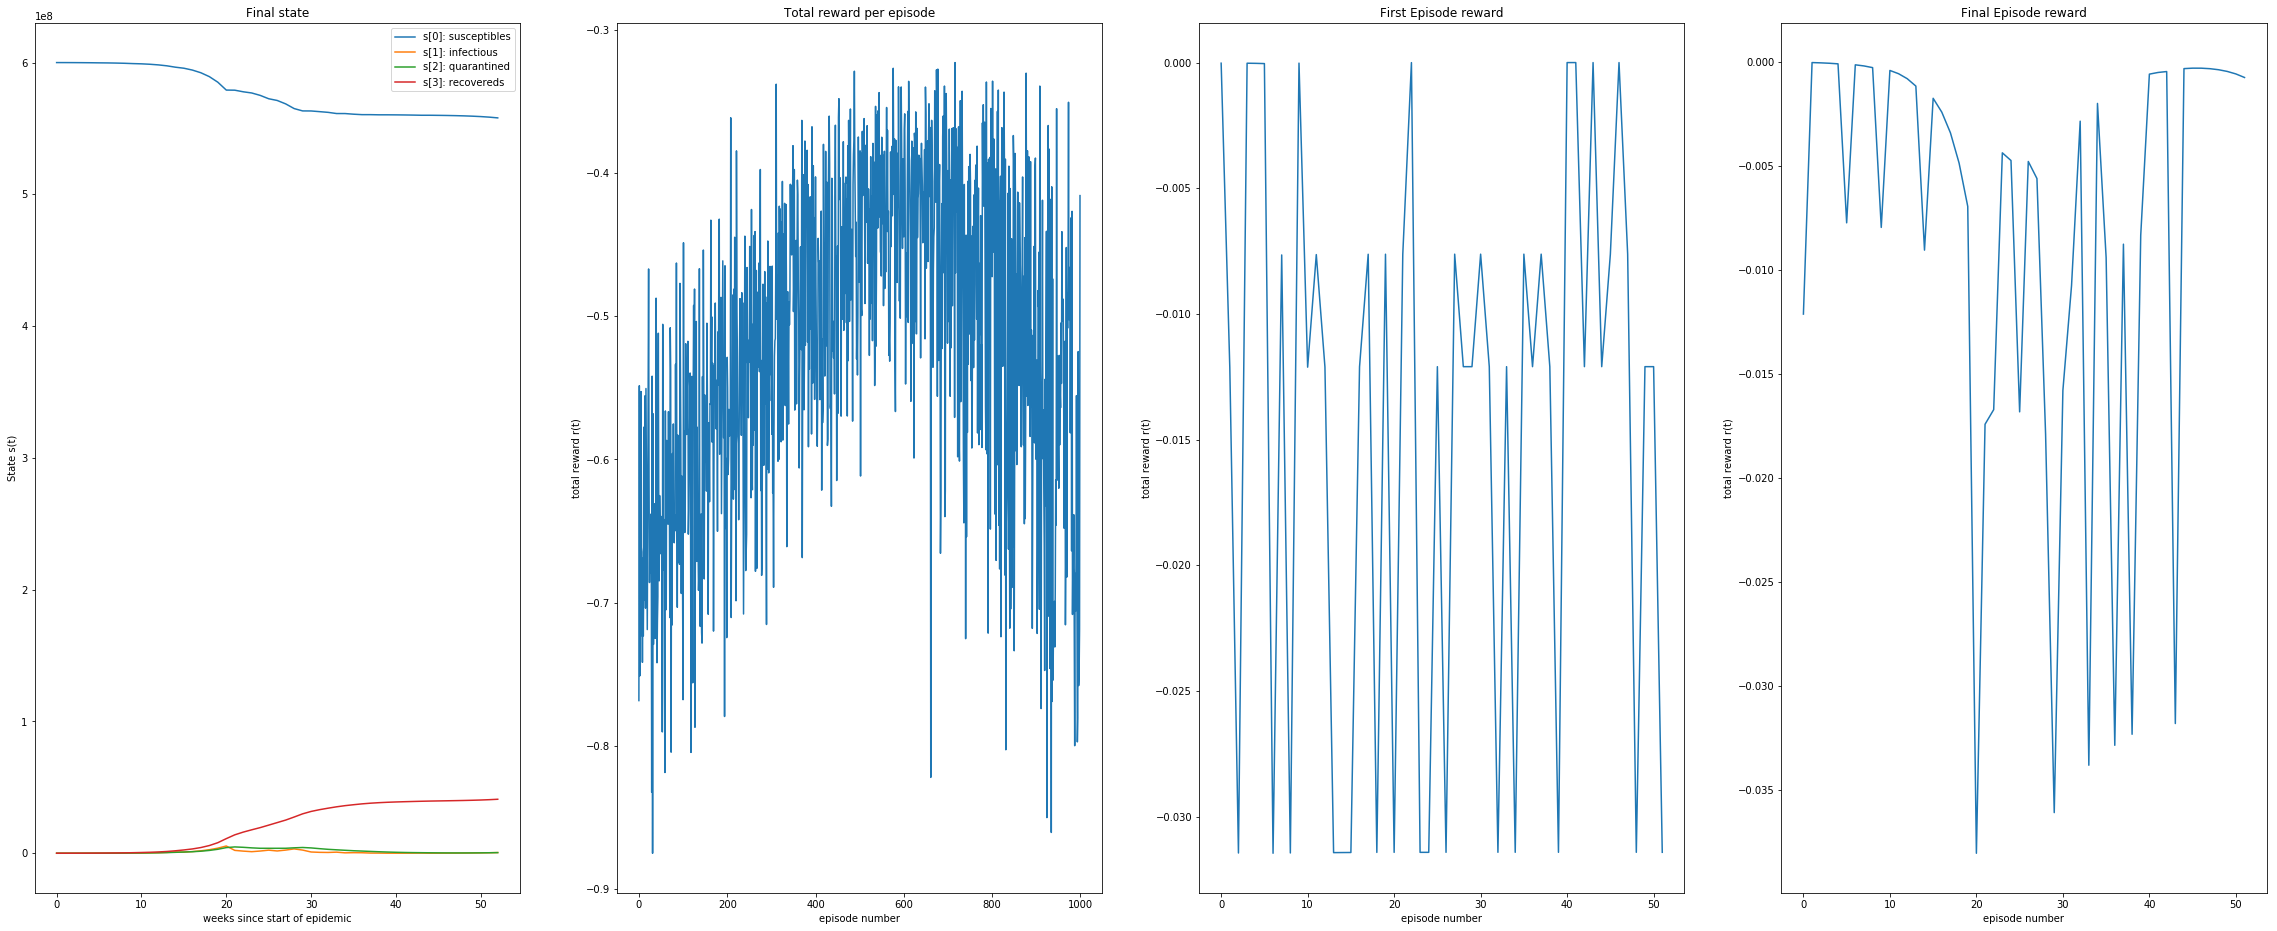

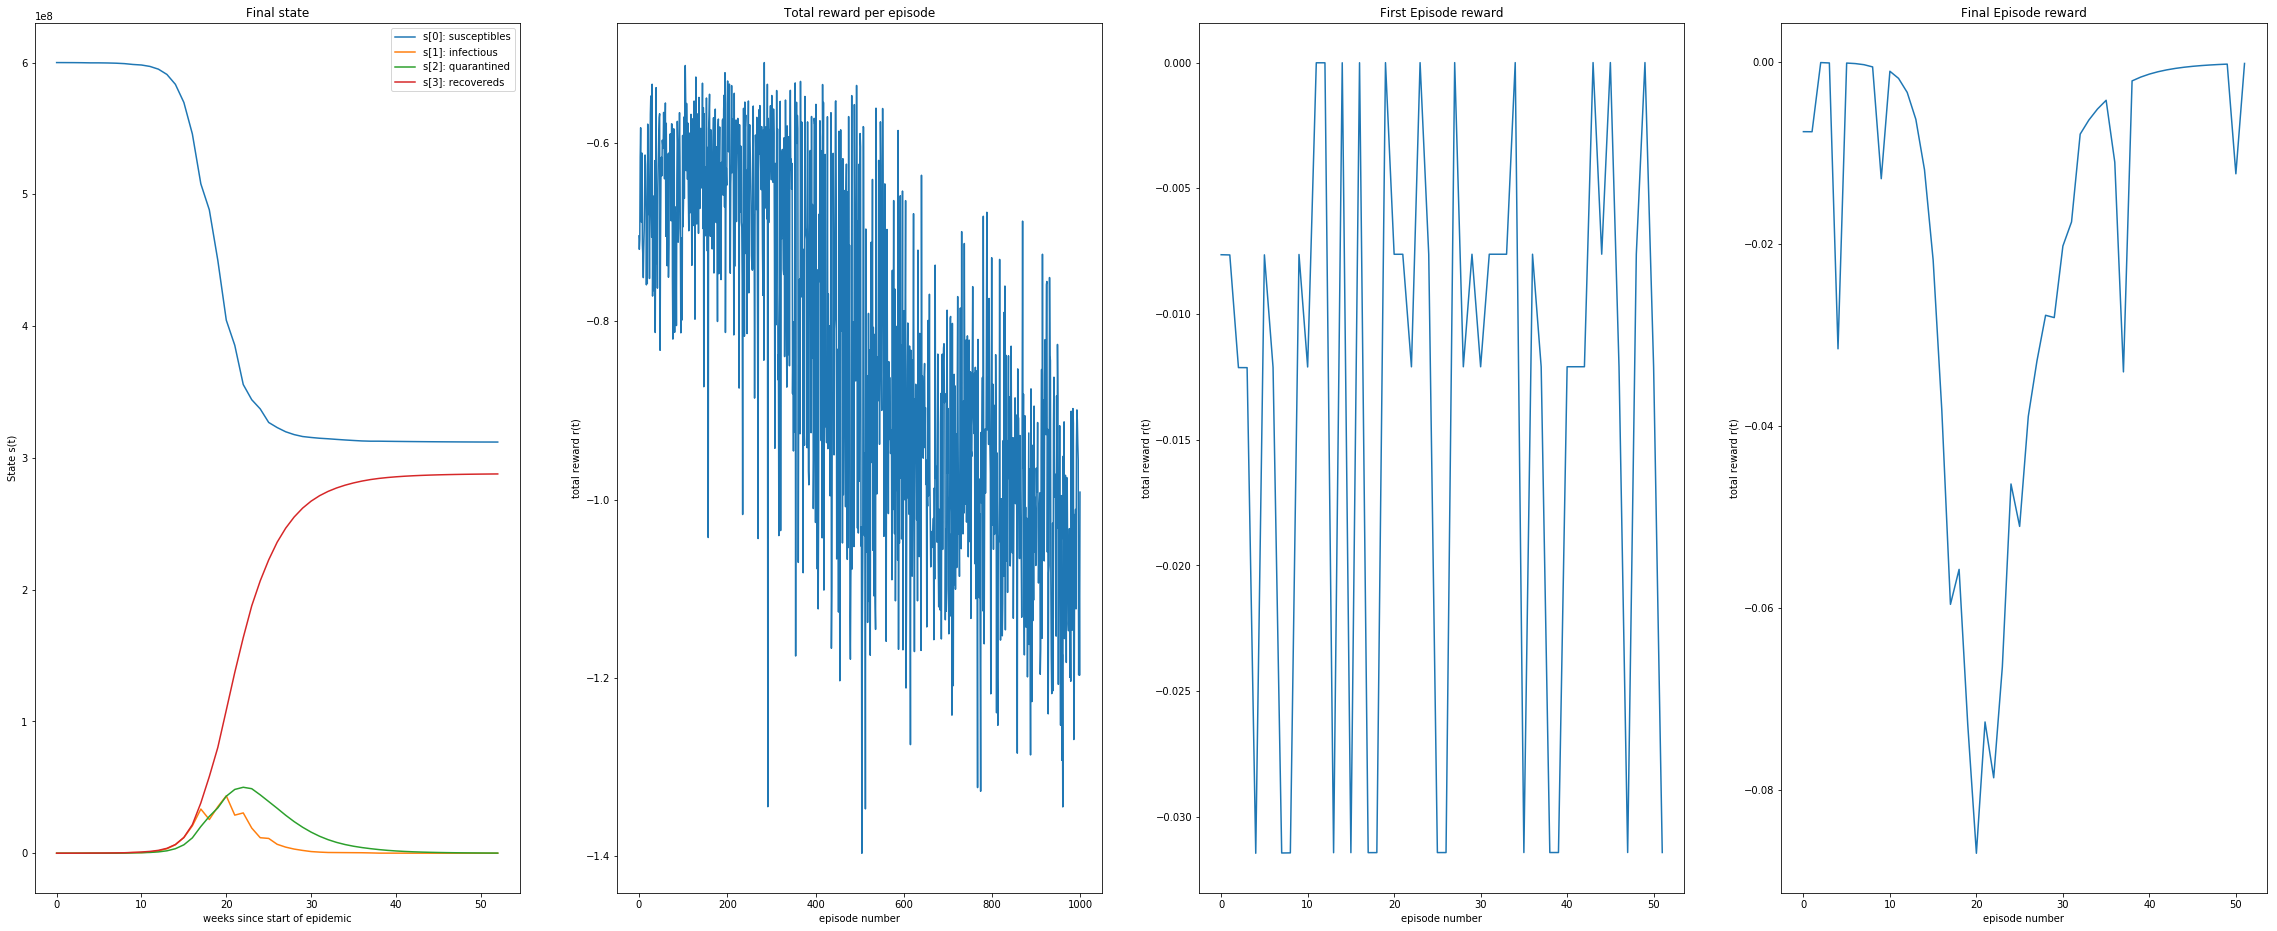

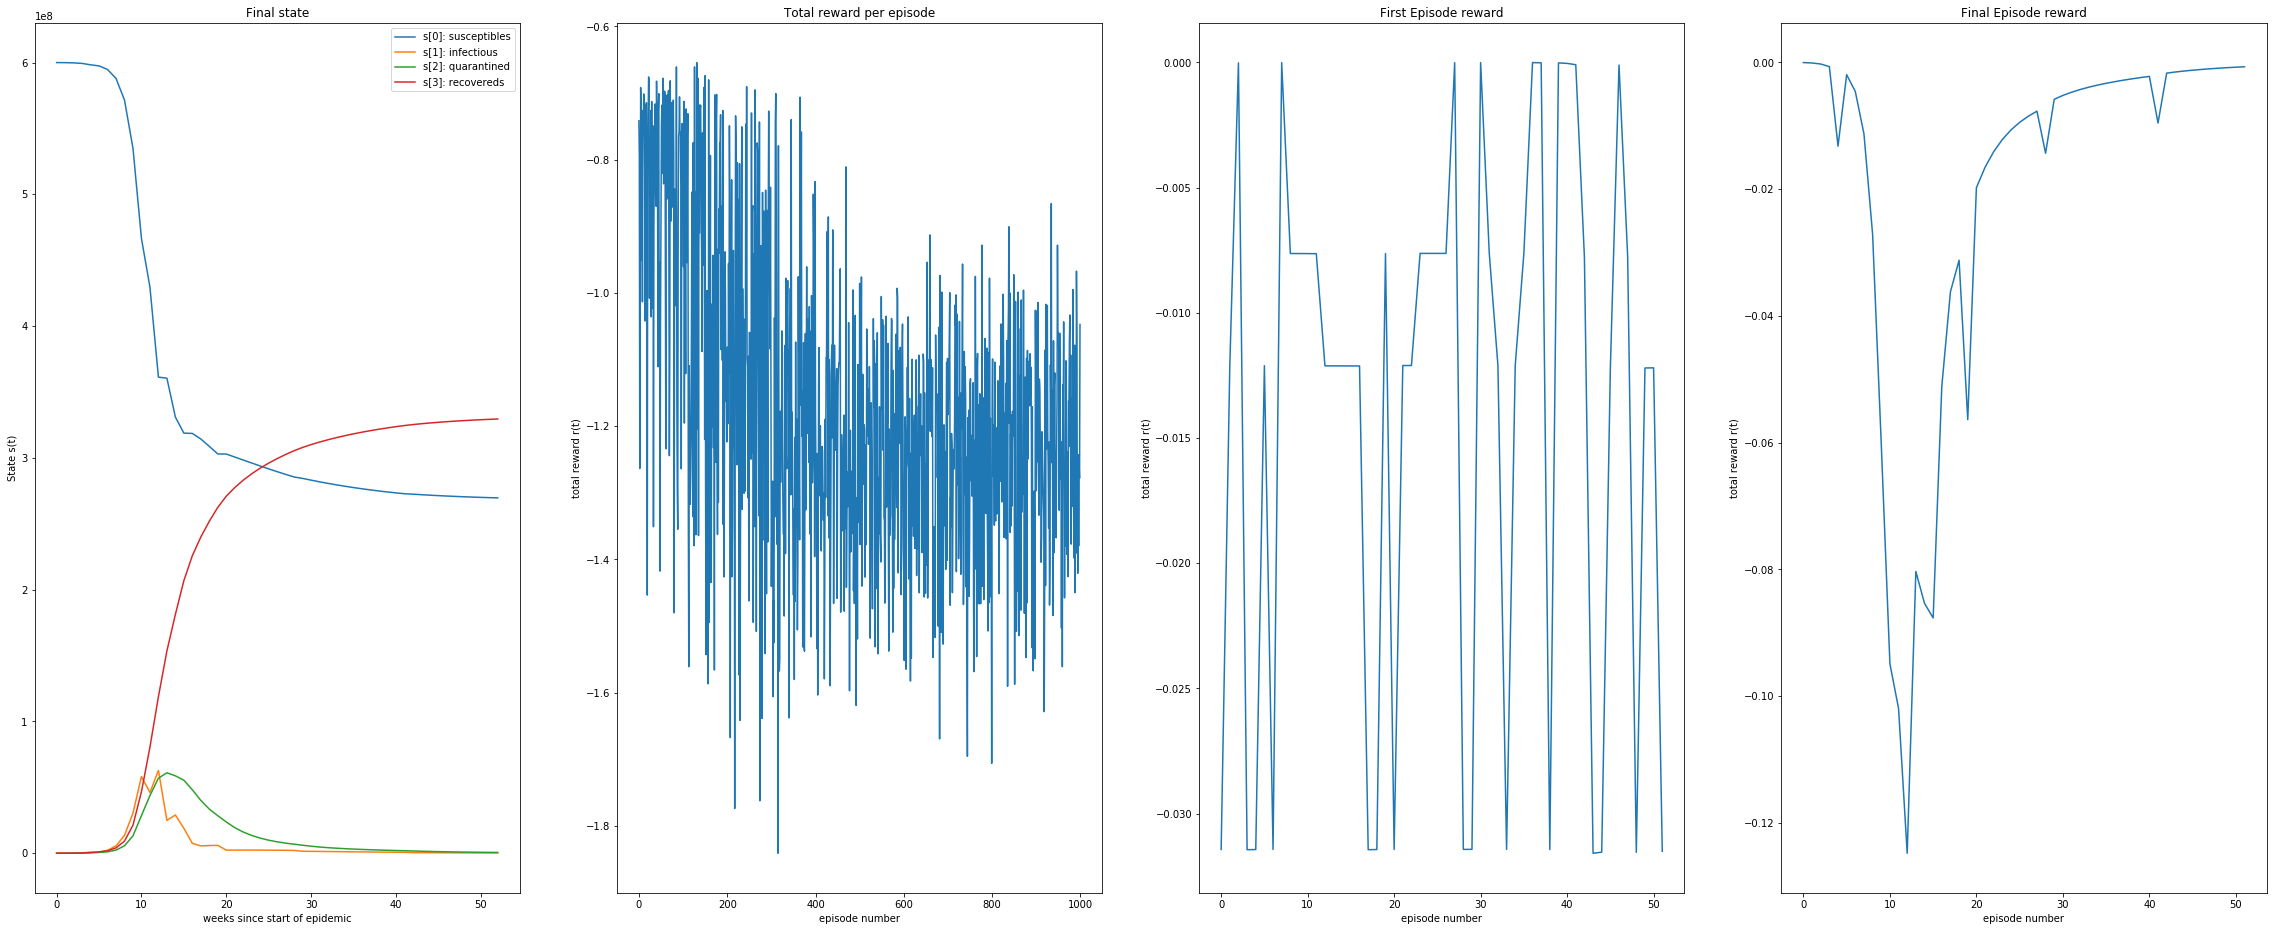

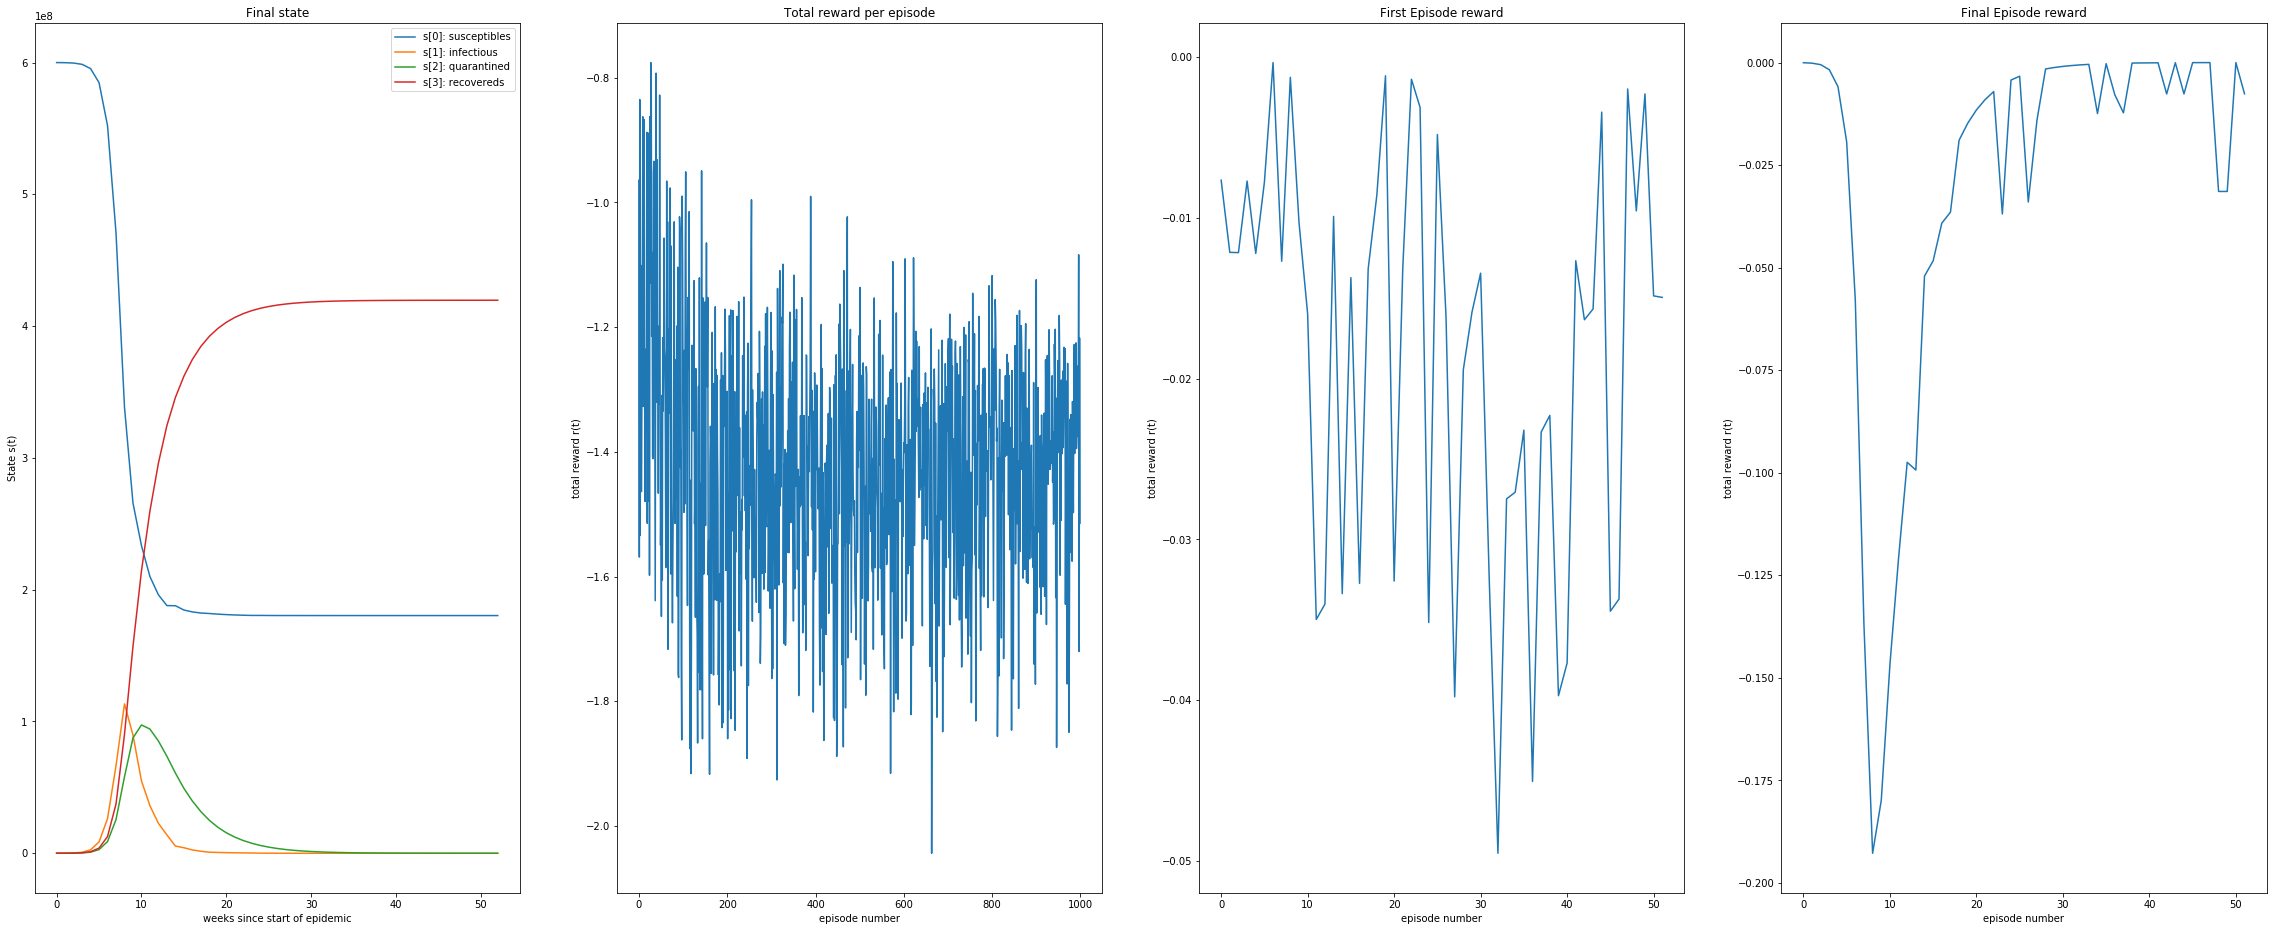

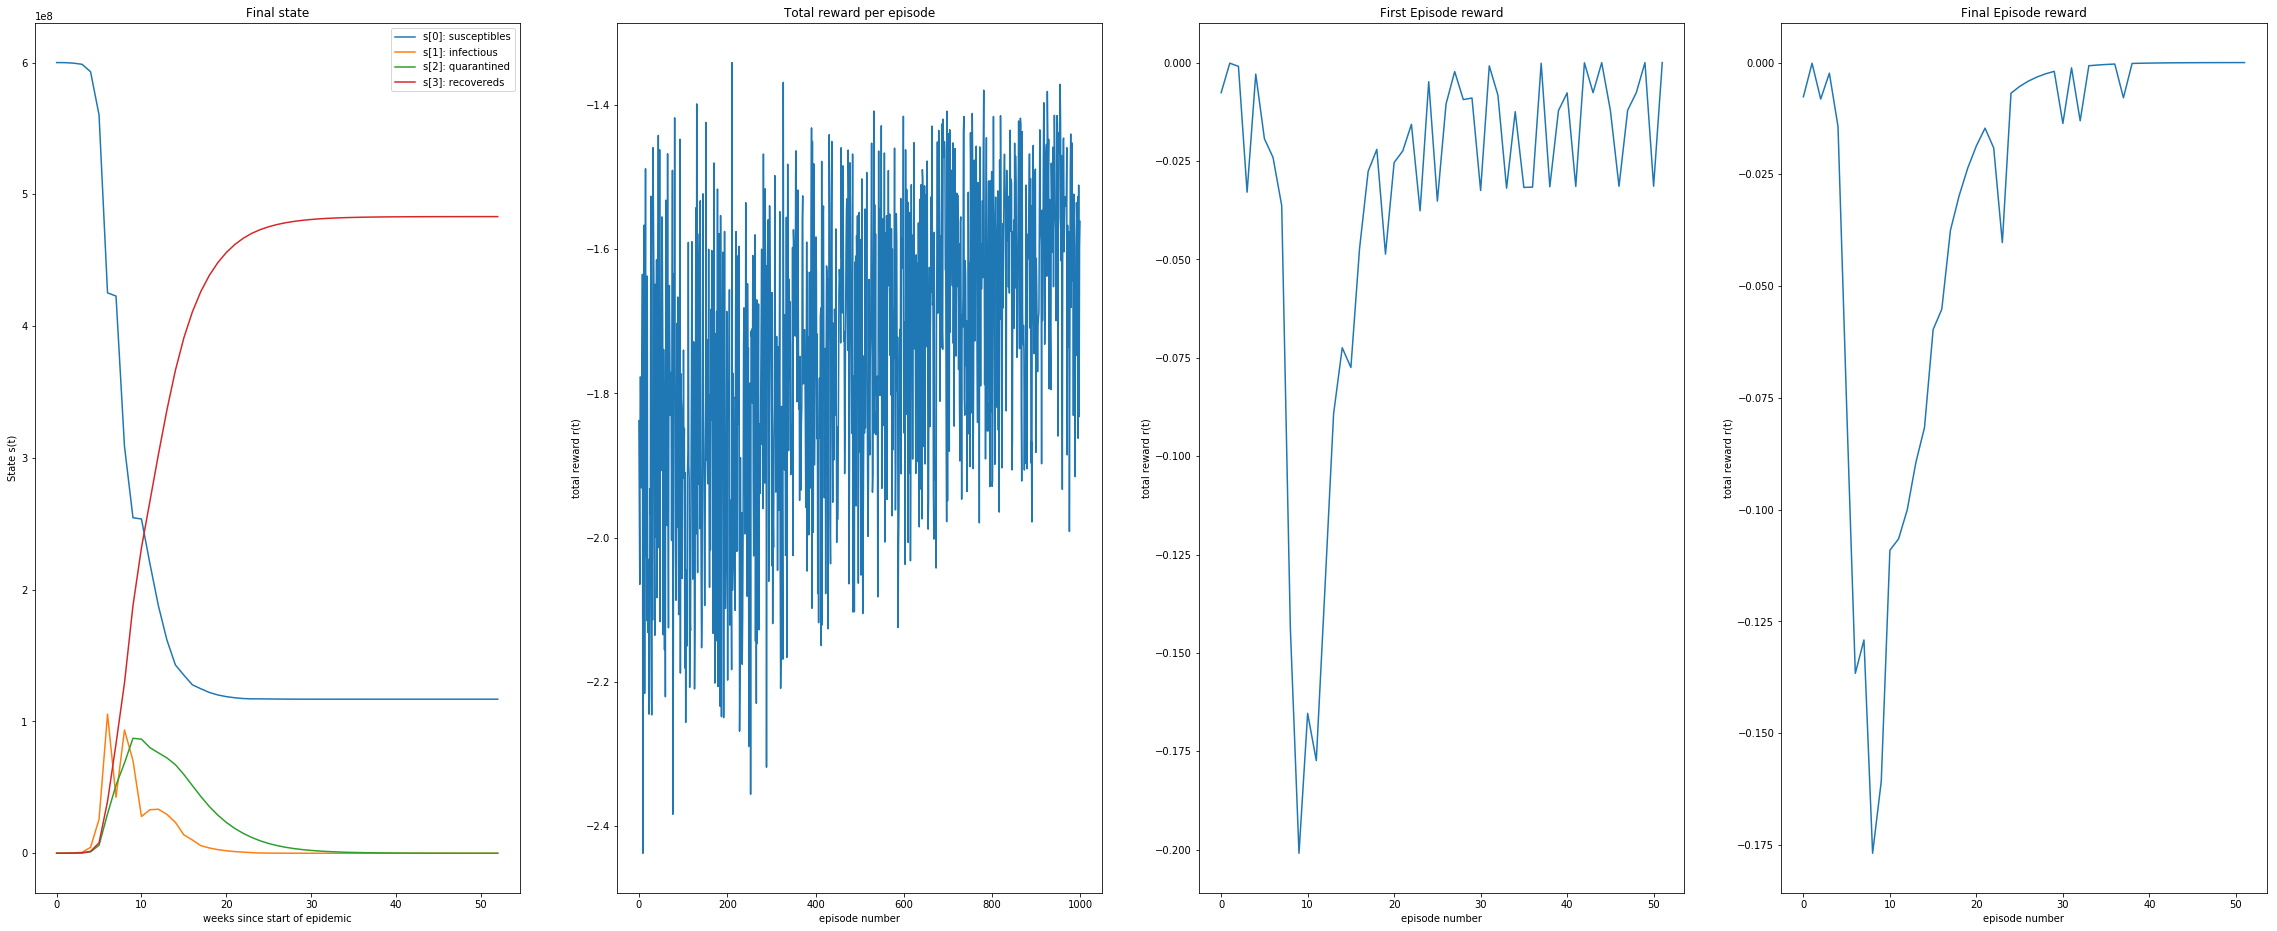

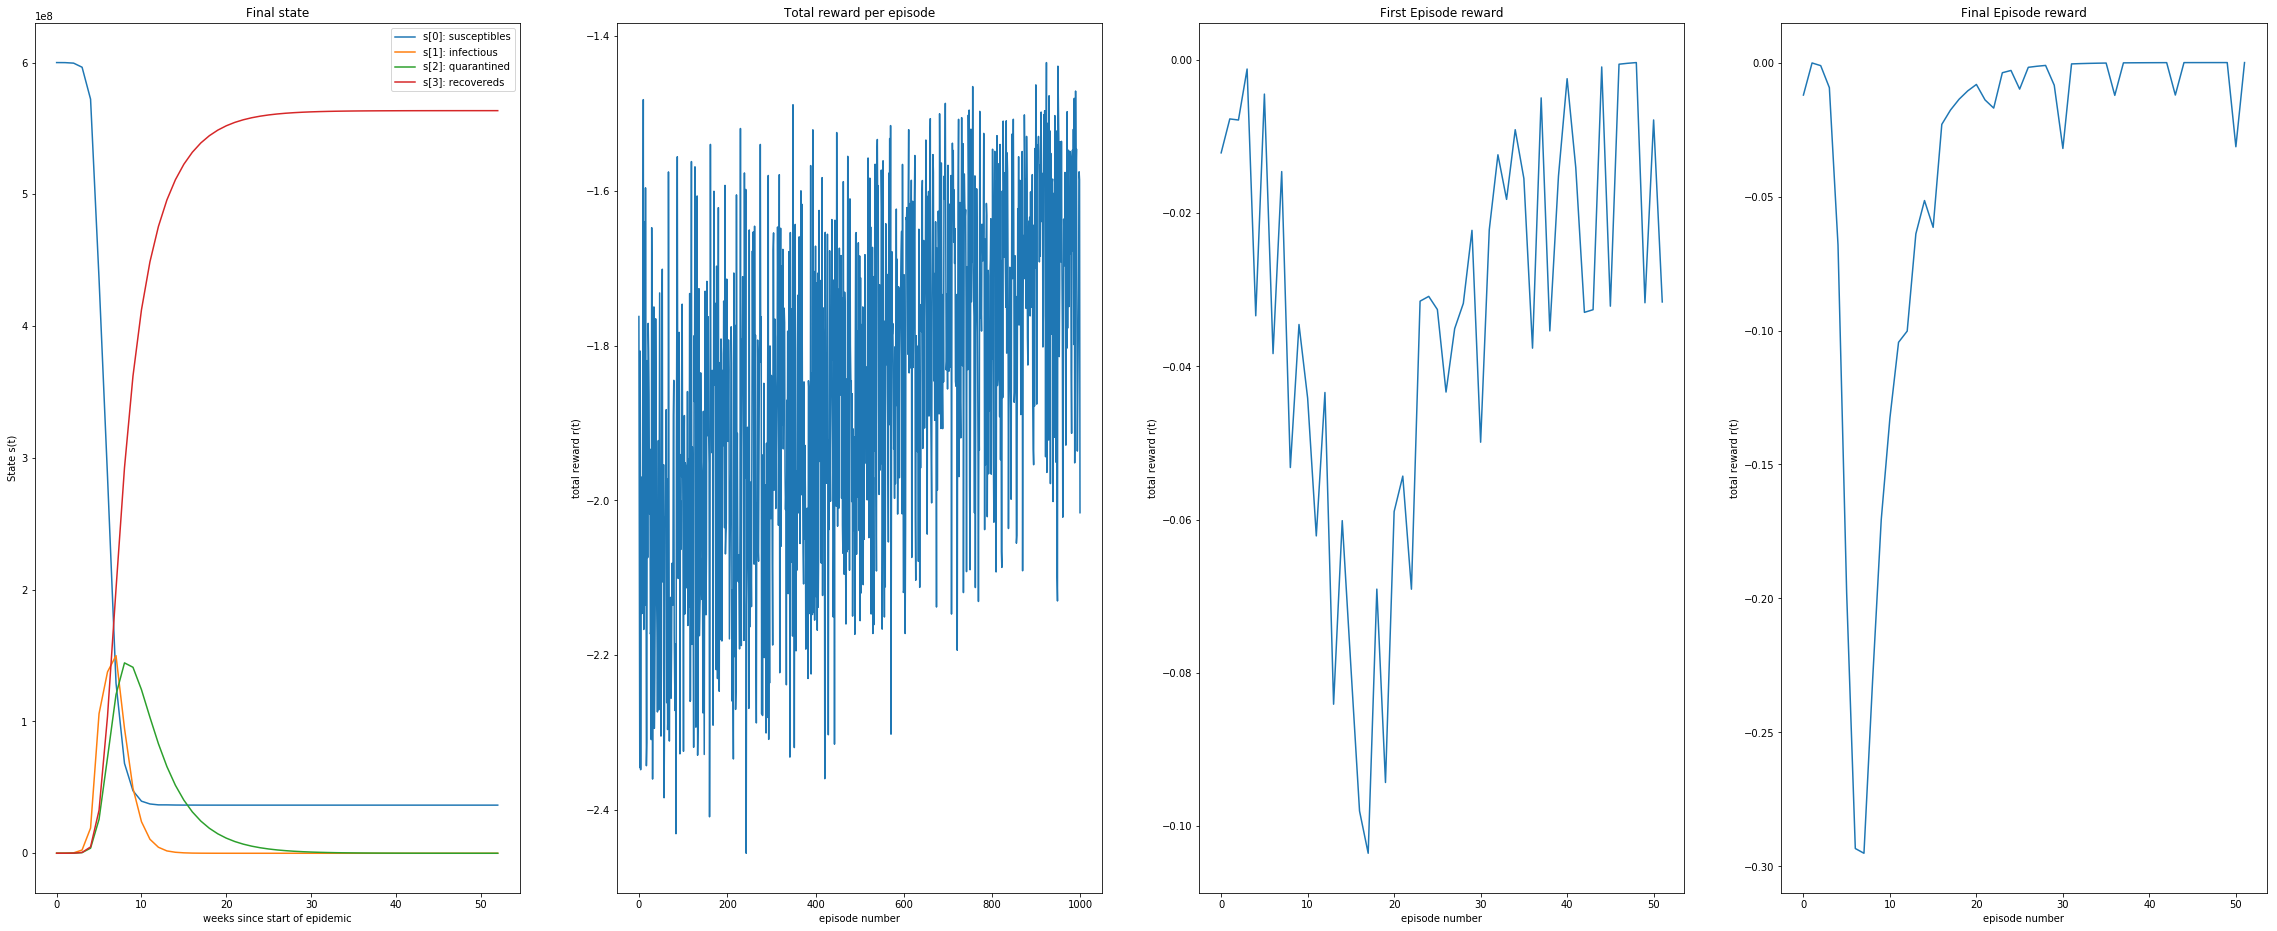

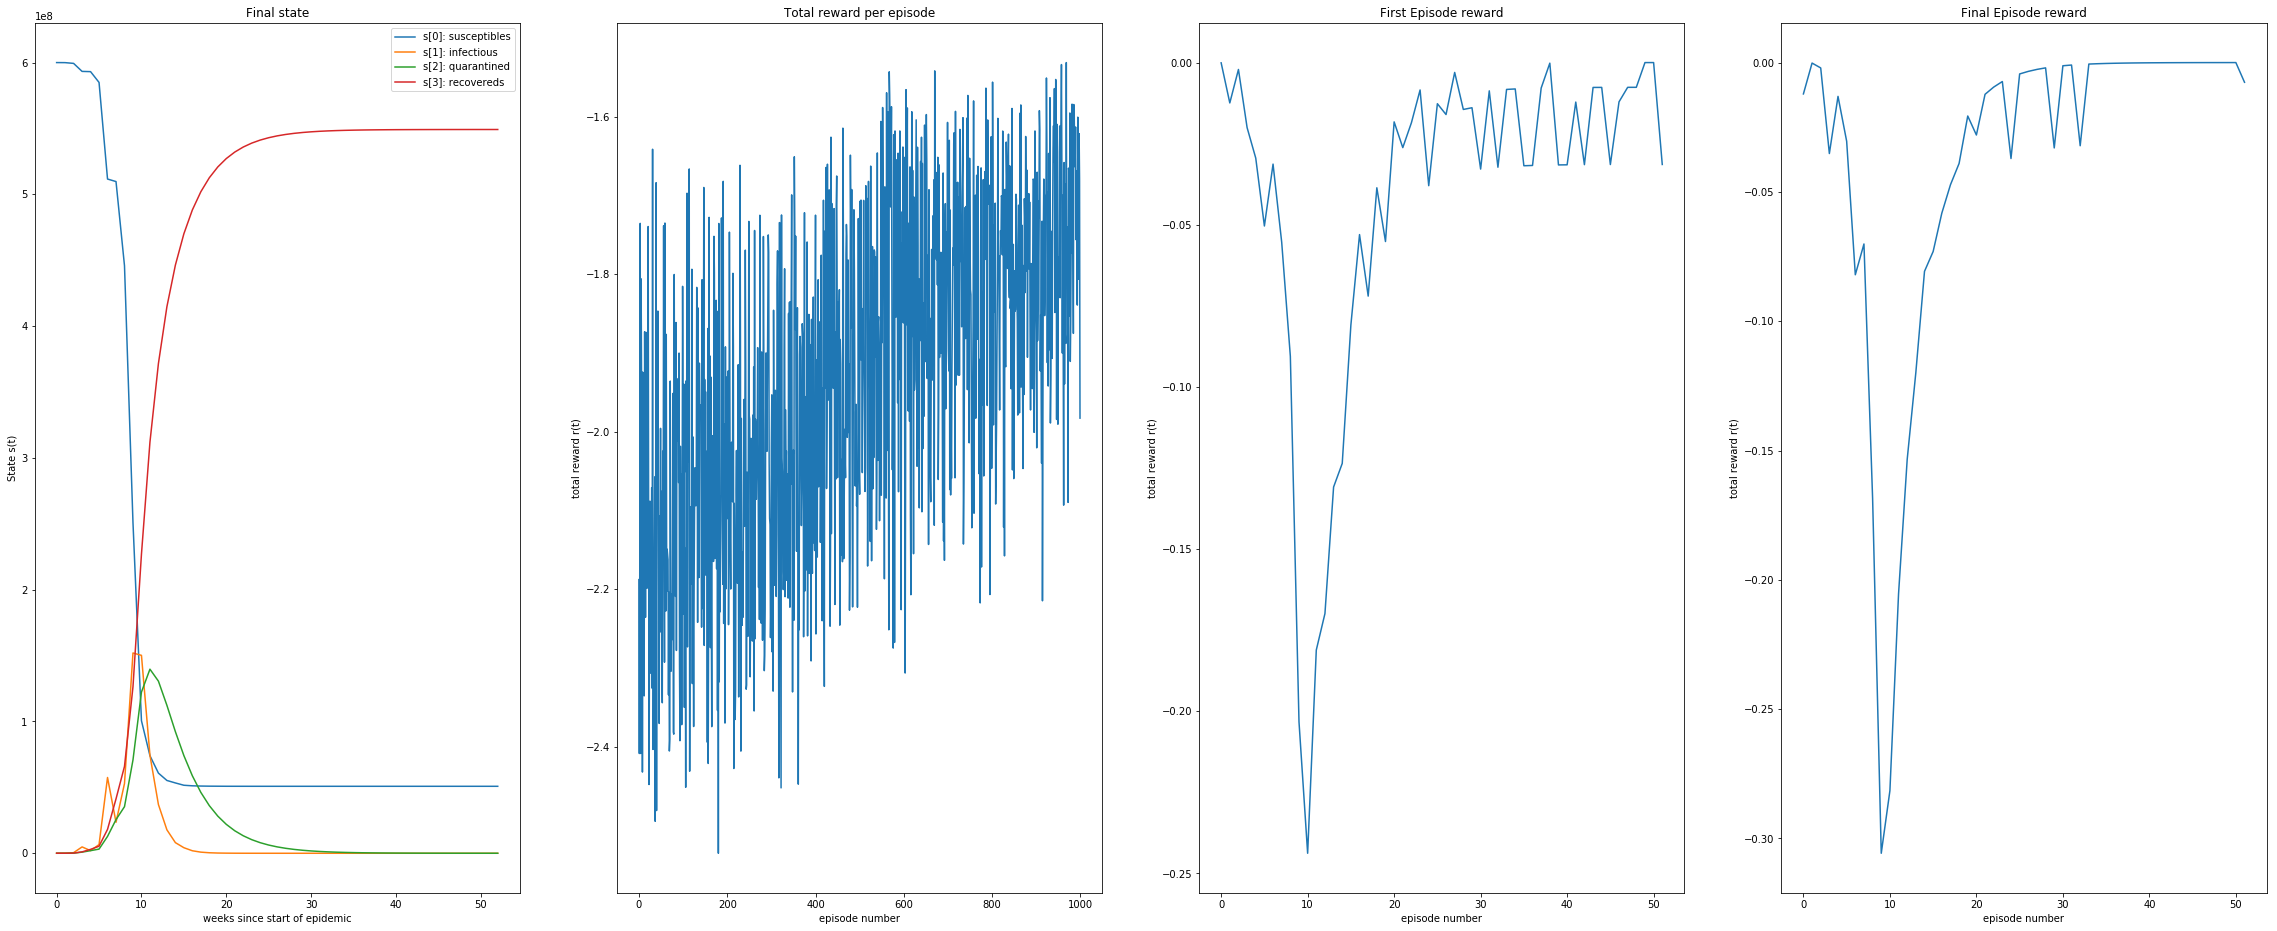

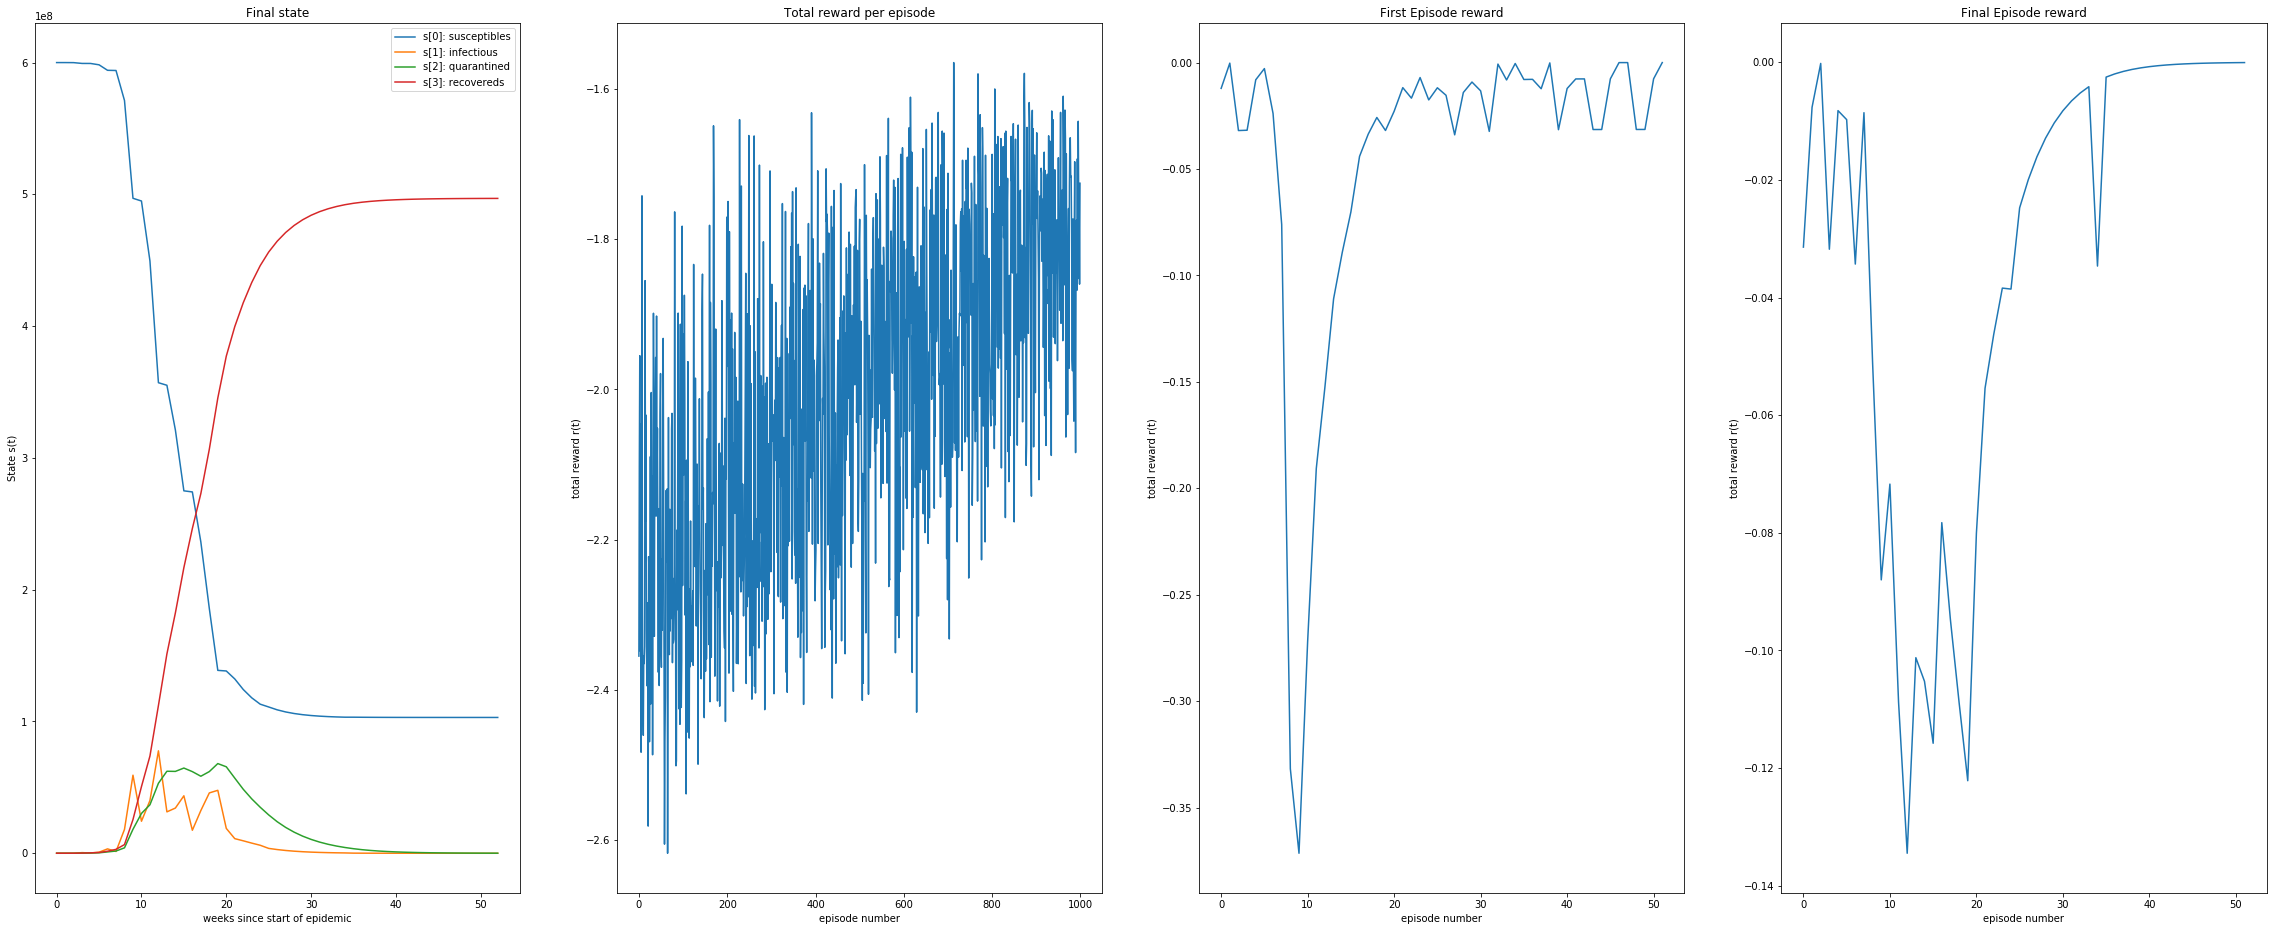

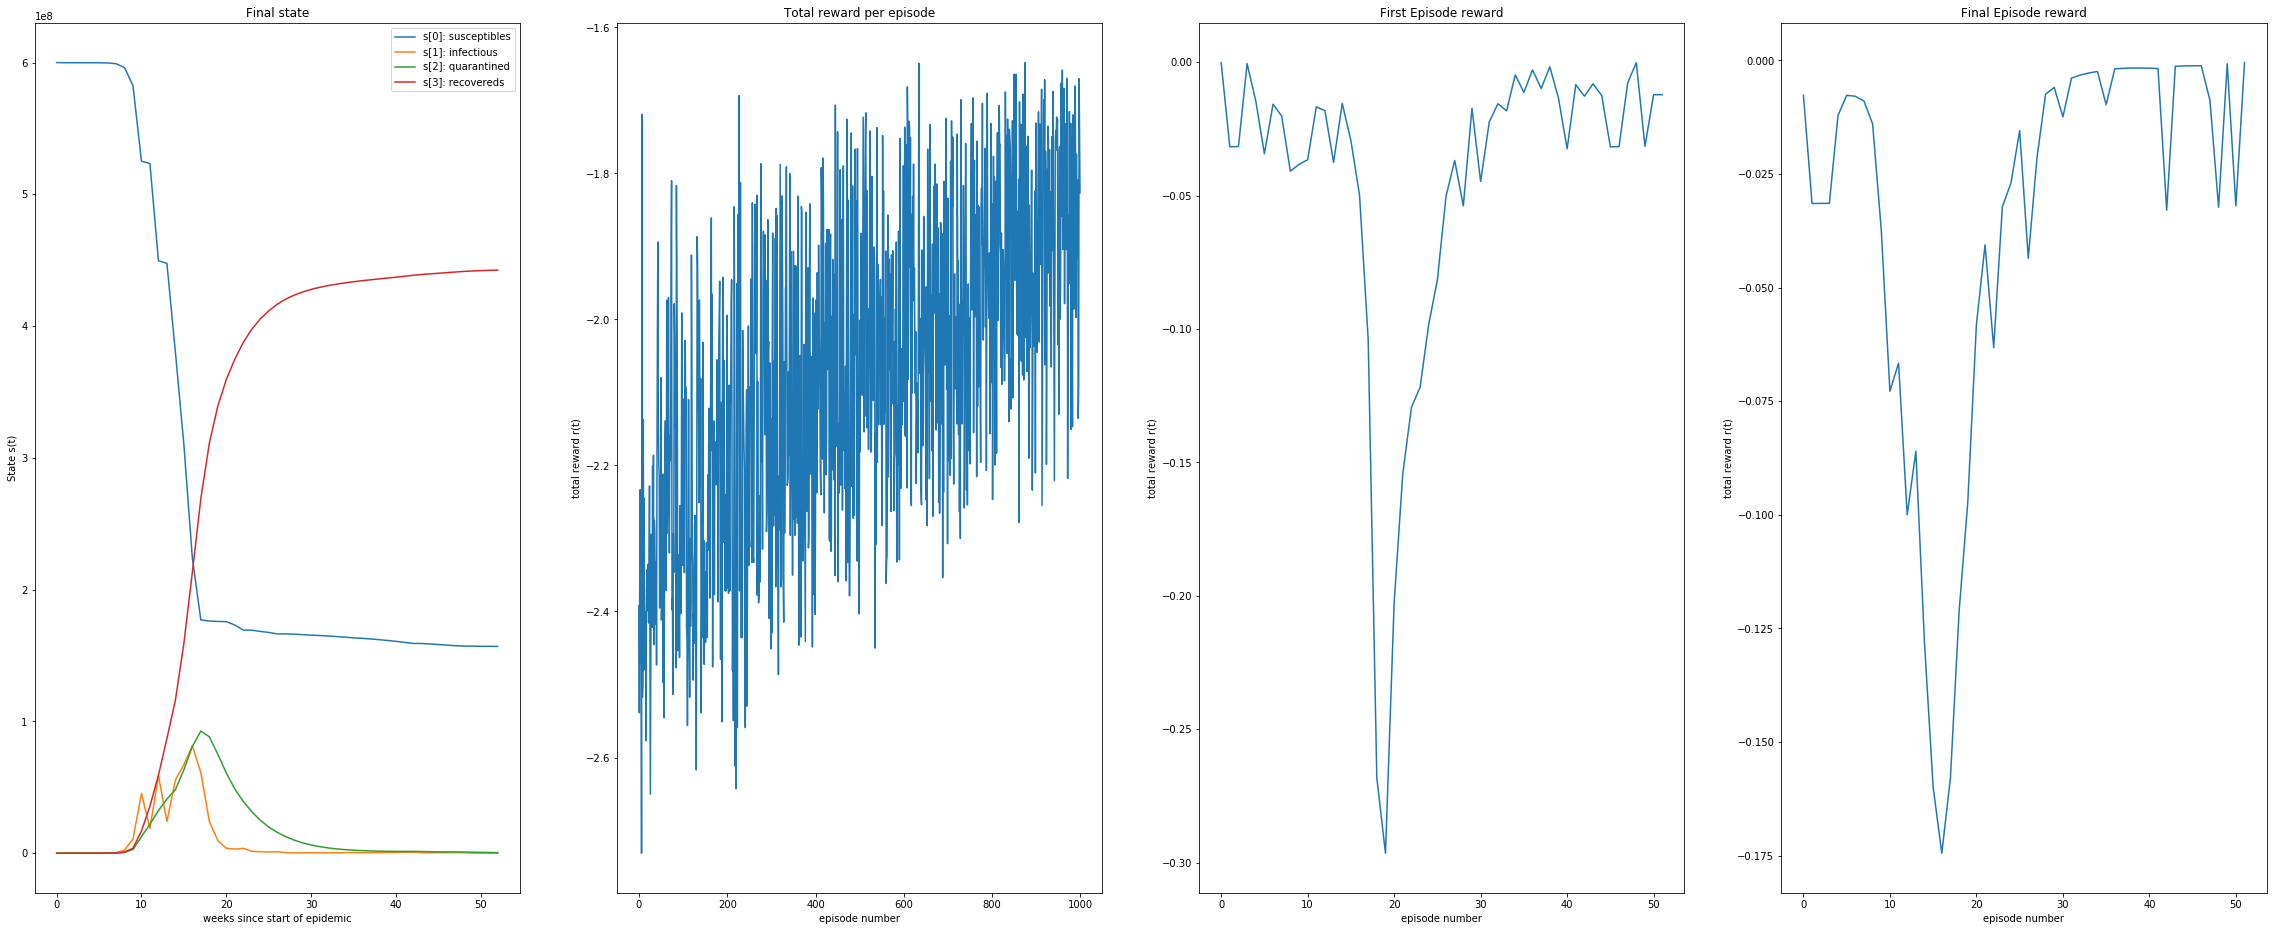

In [4]:
#change the problem id

for i in range(0,10):
    print("----")
    print("Problem id: " + str(i))
    print()
    env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
    title = "Train: problem id " + str(i) + " "
    agent = QLearningAgent(env)
    states,all_rewards, all_total_rewards = agent.train()

    with open('qlearningP' + str(i) + '.pkl', 'wb') as output:
        pickle.dump(agent, output, pickle.HIGHEST_PROTOCOL)
        plot(states,agent, all_total_rewards, all_rewards,title)

stochastic=False, noisy=False
Train: stochastic=False, noisy=False 
Hyperparameter dump
----
Number Of Episodes = 1000
Print out every 20 episodes
Learning Rate = 0.25
Discount = 0.99
----
Initial Epsilon = 1
Epsilon Decrease Factor = 0.00075
----
Number of Bins to Discretise State = 20
----
Episode number: 300. Total reward in episode: -1.608767733629875. Episode executed with epsilon = 0.7757499999999915
Average total reward in last 20 episodes: -0.03232652396488701
Average number of times we exploited q table in last 20 episodes: 12.85
Episode number: 600. Total reward in episode: -1.6638207151048428. Episode executed with epsilon = 0.550749999999983
Average total reward in last 20 episodes: -0.030227131386789542
Average number of times we exploited q table in last 20 episodes: 21.2
Episode number: 900. Total reward in episode: -1.7290531807074645. Episode executed with epsilon = 0.3257499999999874
Average total reward in last 20 episodes: -0.028986876716848877
Average number of tim

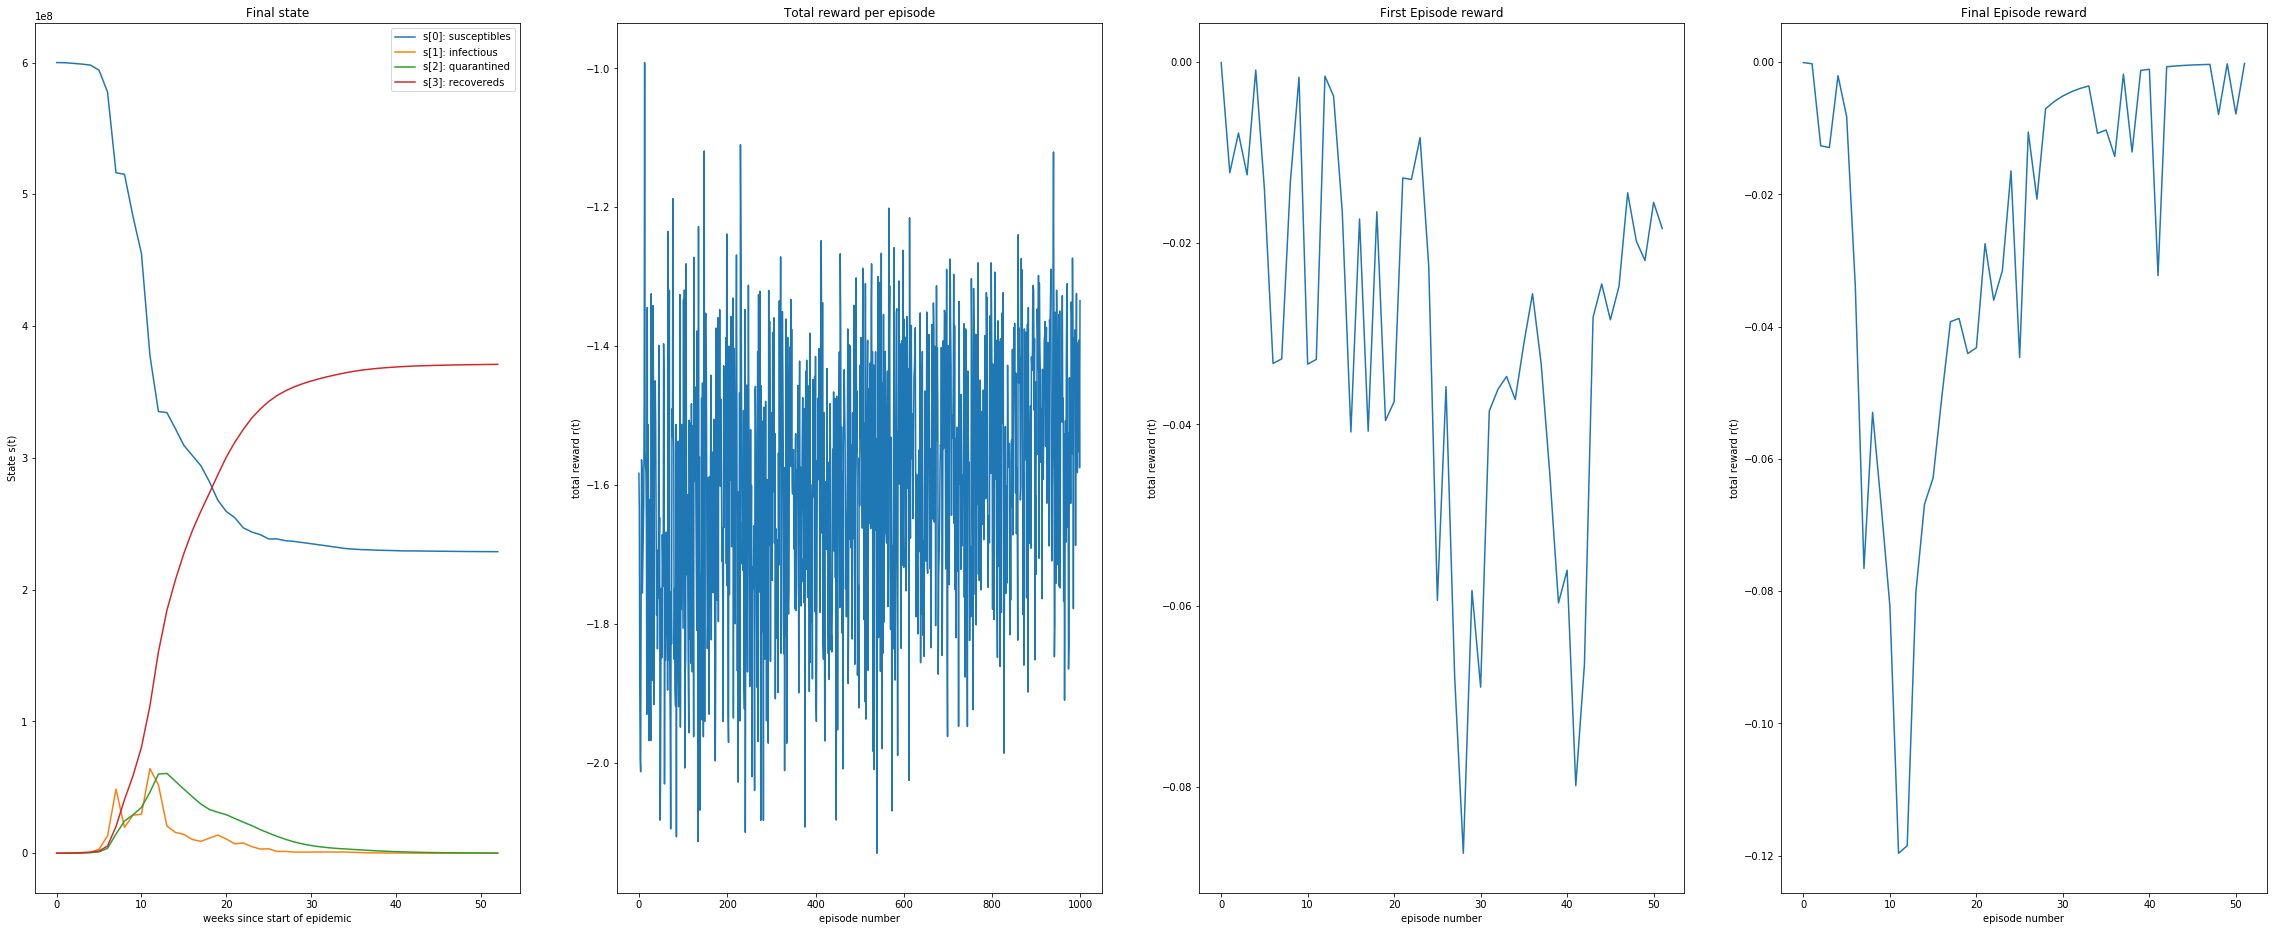

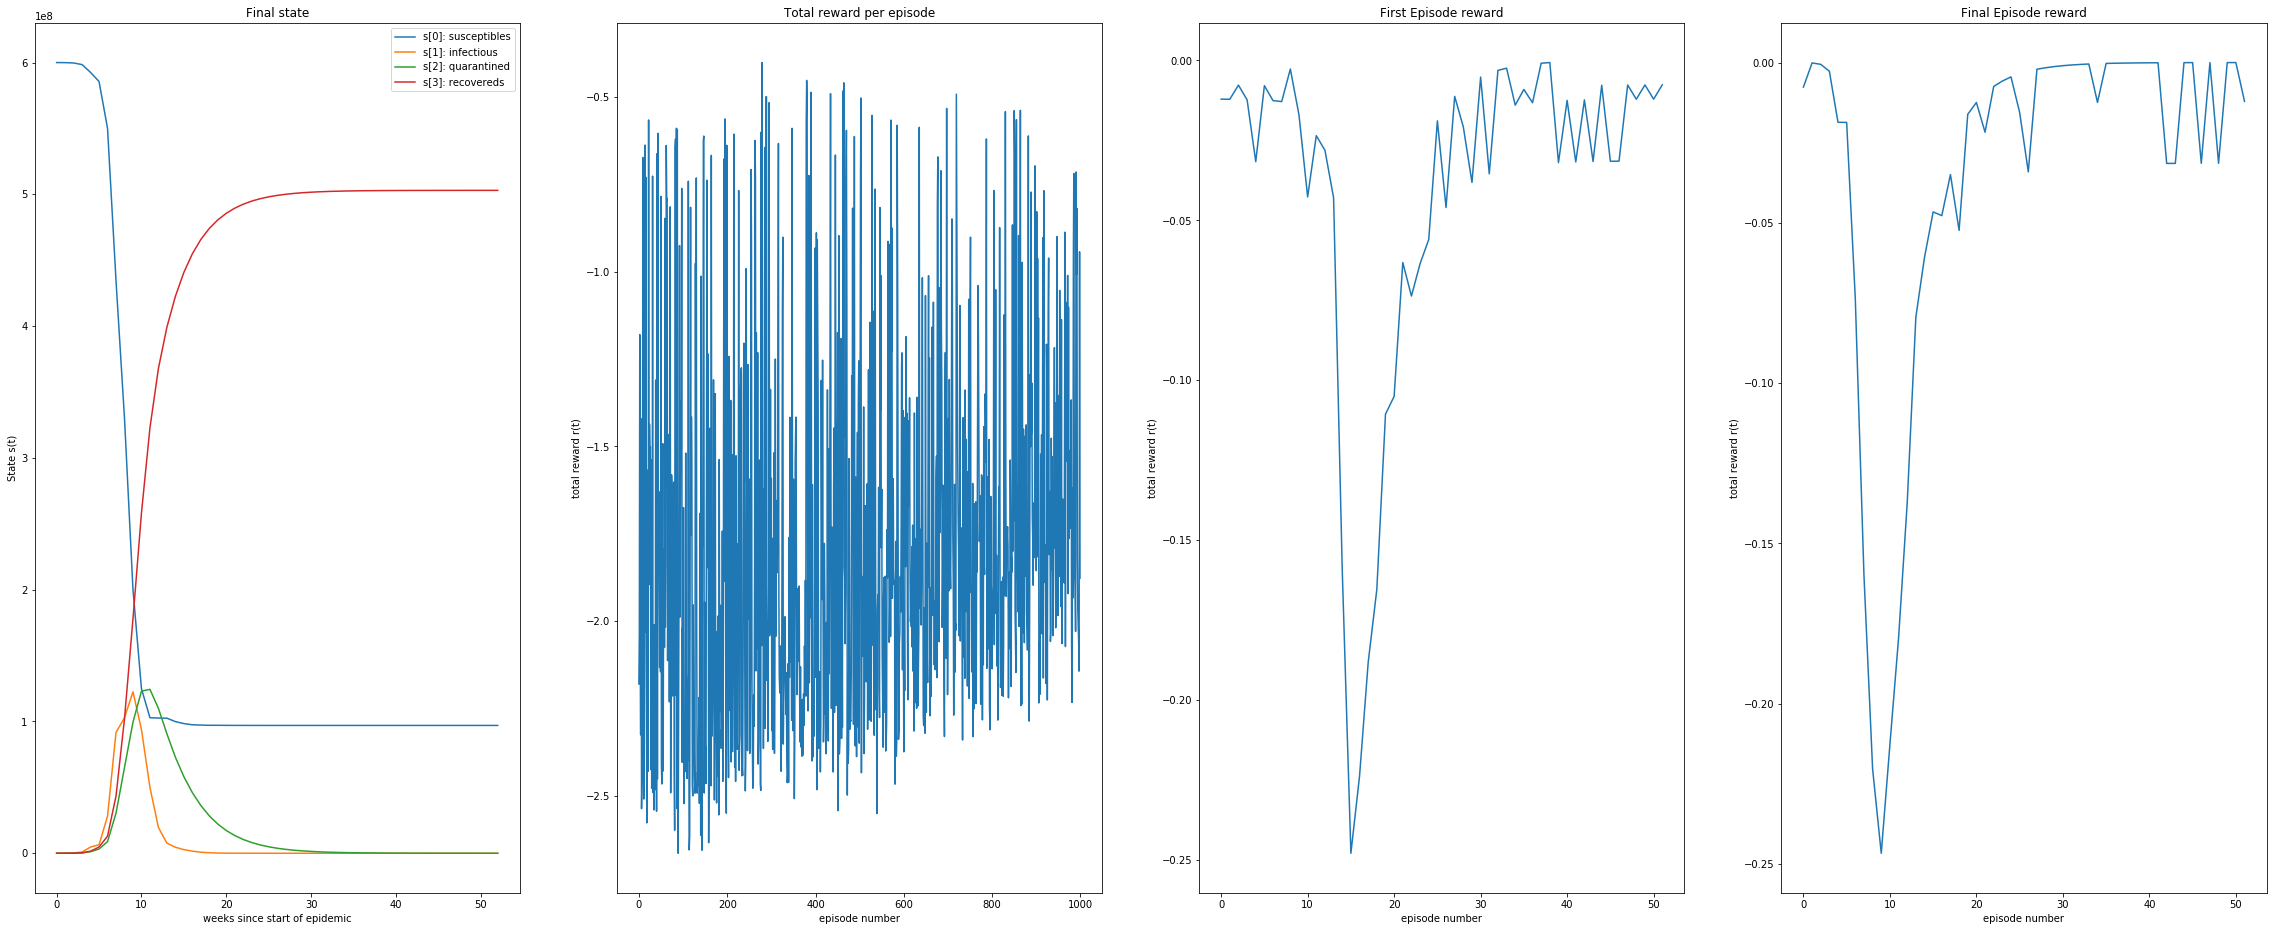

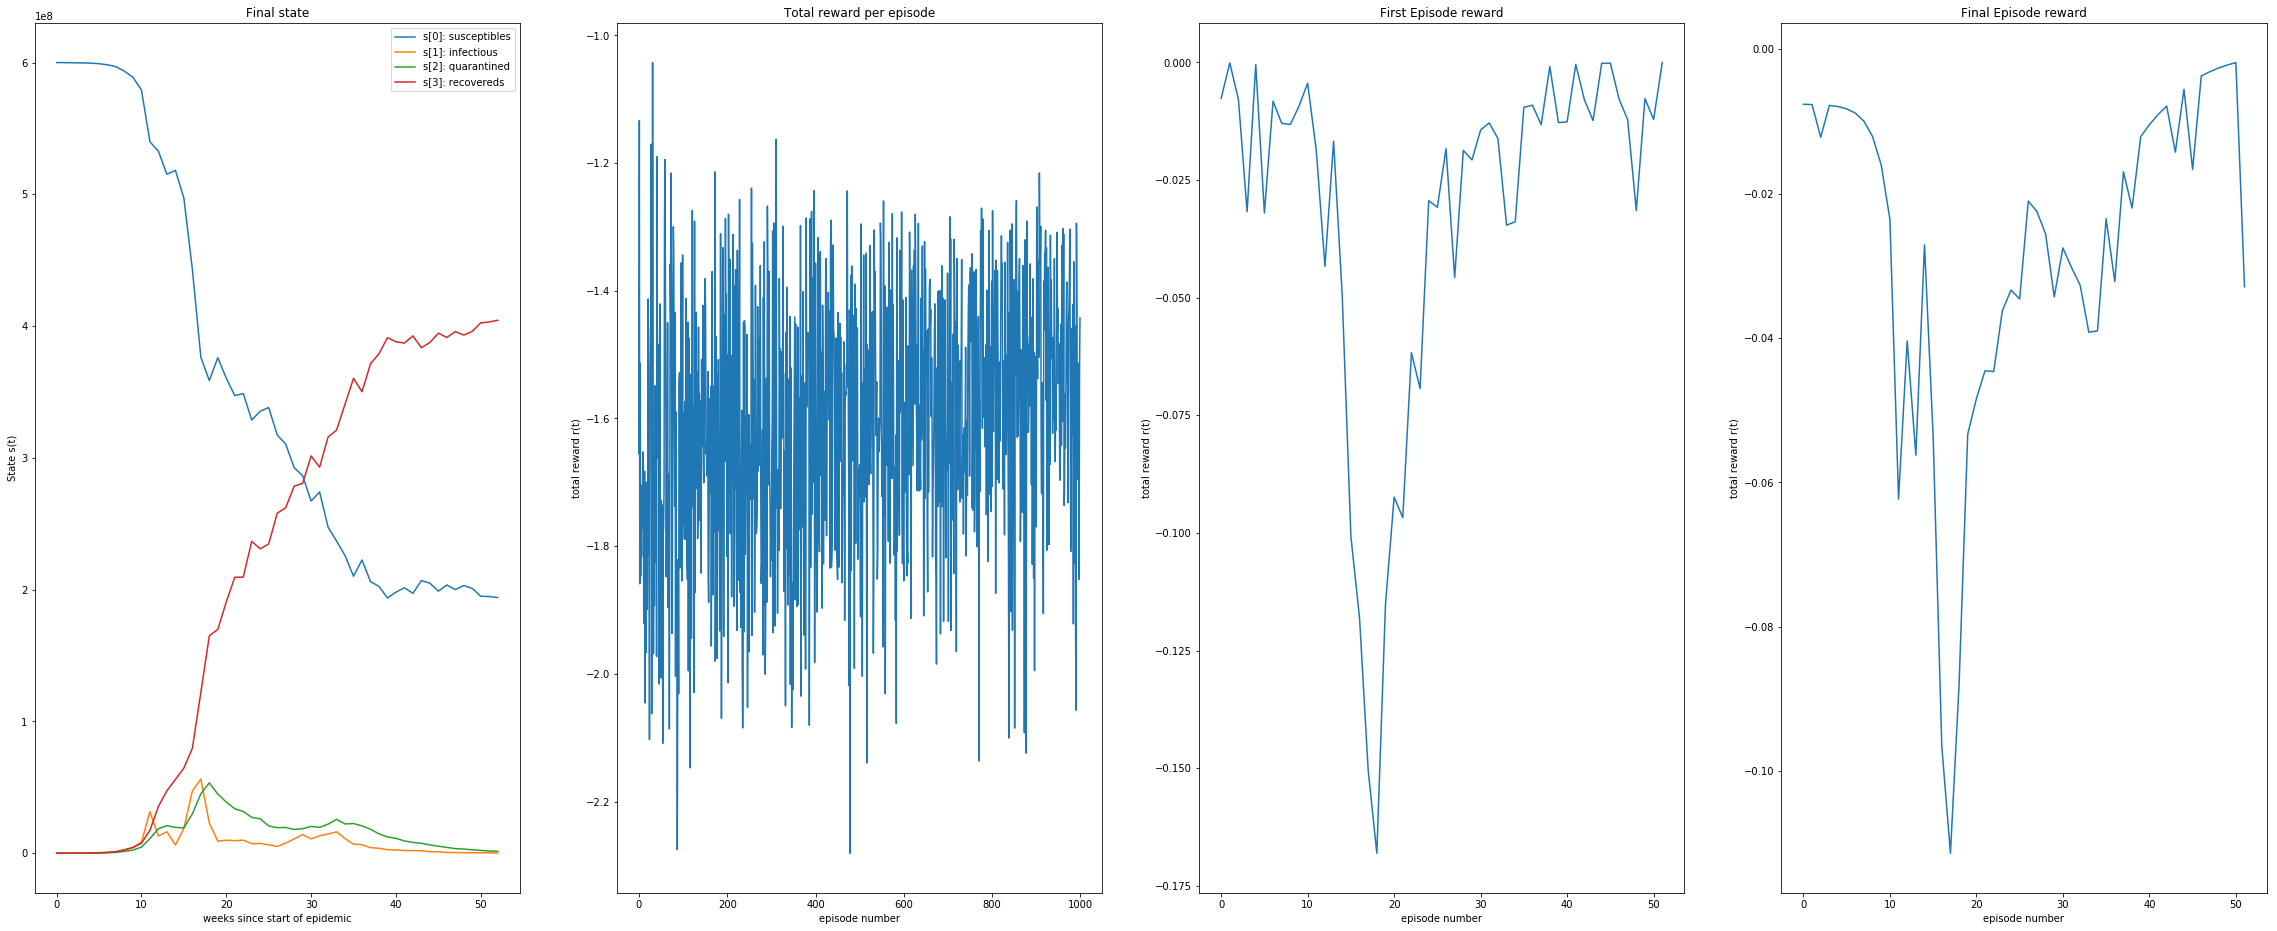

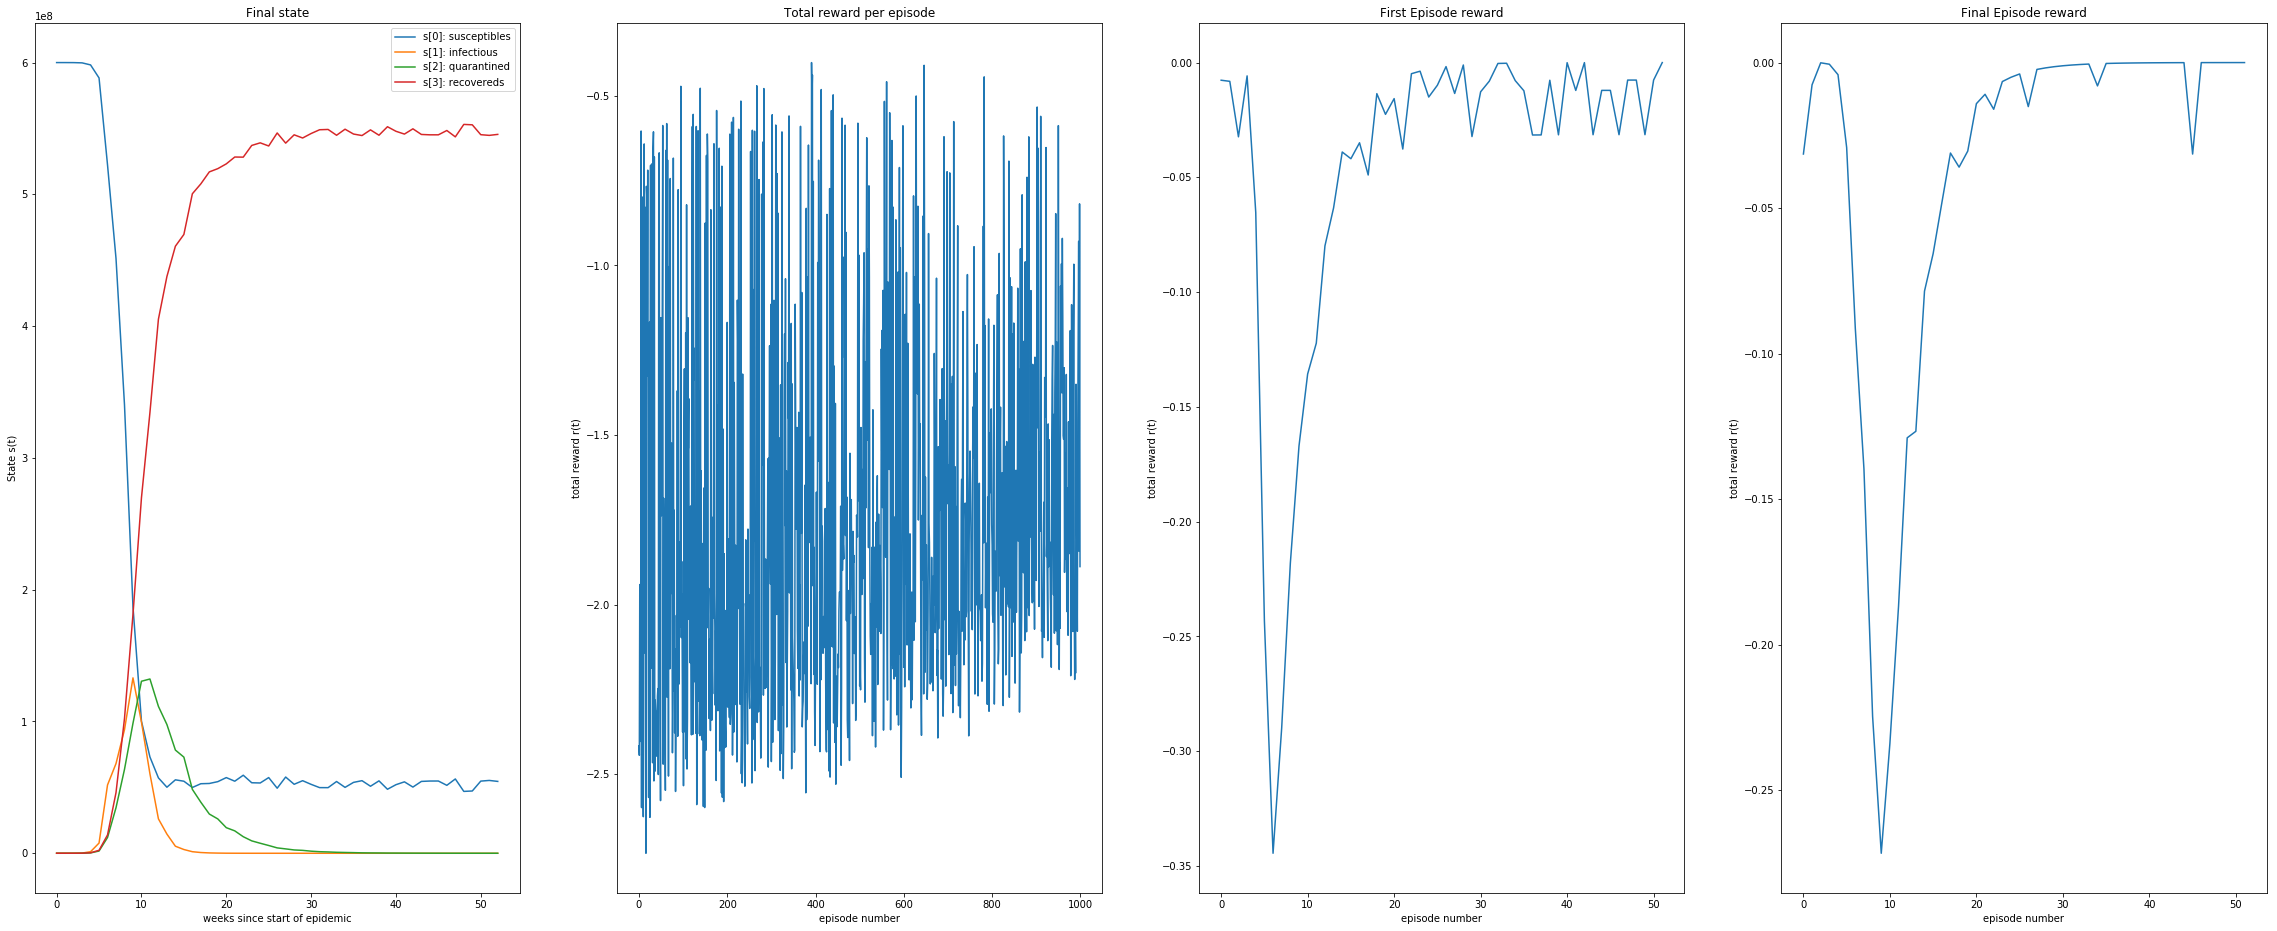

In [6]:
#chnage stochastic and noisy
stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}
for i in range(0,4):
    print("----")
    print(stochastic_noisy_print[i])
    env = stochastic_noisy[i]     
    
    title = "Train: " + stochastic_noisy_print[i] + " "
    print(title)
    agent = QLearningAgent(env)
    states,all_rewards, all_total_rewards = agent.train()

    #outputs binaries
    with open('qlearningS' + str(i) + '.pkl', 'wb') as output:
        pickle.dump(agent, output, pickle.HIGHEST_PROTOCOL)
        plot(states,agent, all_total_rewards, all_rewards,title)


In [7]:
total_reward_sd = np.std(all_total_rewards)
total_reward_mean = np.mean(all_total_rewards)
reward_sd = np.std(all_rewards)
reward_mean = np.mean(all_rewards)

print("Total reward standard deviation = " + str(total_reward_sd))
print("Total reward mean = " + str(total_reward_mean))
print("Reward standard deviation = " + str(reward_sd))
print("Rotal reward mean = " + str(reward_mean))

Total reward standard deviation = 0.5447413269968976
Total reward mean = -1.75045029849995
Reward standard deviation = 0.057354572397891664
Rotal reward mean = -0.03366250574038366


## Evaluation

Eval here